# Editing a StoryMap

First, import the necessary modules. The storymap module is held in the apps part of arcgis.  
We can use a profile to sign into our ArcGIS Online organization.

In [1]:
import os
from arcgis.gis import GIS
from arcgis.apps.storymap import StoryMap, Image

gis = GIS(profile="geosaurus")

### Set up variables
These will be used later in the workflow.

In [2]:
palm_springs_extent = {'spatialReference': {'wkid': 102100},
                     'xmin': -12987175.316045739,
                     'ymin': 3999201.851020532,
                     'xmax': -12960670.77648789,
                     'ymax': 4010667.405263293}

image_folder = r"C:\workspace\Content\DevSummit2025\palm_springs"

## Get existing StoryMap
Using the content manager we can get a storymap item with it's itemid.

<Item title:"Exploring San Diego" type:StoryMap owner:naubry_geosaurus>
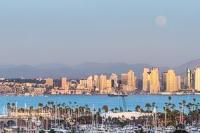

In [3]:
item = gis.content.get("f138997fab454f358c86218ff1e07161")
item

Pass the item to the StoryMap class. This reads in all the properties and will allow us to futher edit.

In [4]:
# Create an instance of storymap class
storymap = StoryMap(item)

# See list of content
storymap.content_list

[Cover, Navigation, Text: paragraph, Image Gallery, Sidecar, 'Credits']

## Duplicate the StoryMap
We want to make edits to this story but not the original. We can duplicate the story to create a new copy of it in our organization.

<Item title:"Exploring Palm Springs" type:StoryMap owner:naubry_geosaurus>
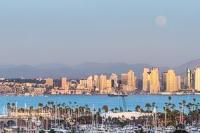

In [5]:
new_story_item = storymap.duplicate("Exploring Palm Springs")
new_story_item

A new storymap item was created, just like we did before, we can pass it into the StoryMap class.

In [6]:
new_story = StoryMap(new_story_item)
new_story.content_list

[Cover, Navigation, Text: paragraph, Image Gallery, Sidecar, 'Credits']

## Let's go through each content and update as needed

### Change the cover

In [7]:
# Assign content to a variable
content = new_story.content_list

# Start with cover
cover = content[0]
type(cover)

arcgis.apps.storymap.story_content.Cover

Cover is a class so it has properties and methods we can use for editing.

In [8]:
cover.title

'Exploring San Diego'

In [9]:
cover.title = "Exploring Palm Springs"
cover.media = Image(fr"{image_folder}\photo1.jpeg")

We see both these properties have been updated.

In [10]:
print(cover.title)
print(cover.media.image)

Exploring Palm Springs
photo1.jpeg


### Change the Text

The next content to change is the text.

In [11]:
text = content[2]
text

Text: paragraph

In [12]:
text.text

'“From its origins as Kumeyaay land to its rise as a military and biotech hub, San Diego is a city shaped by geography, innovation, and diverse communities.”'

In [13]:
text.text = '"From its roots as Cahuilla land to its rise as a desert oasis for Hollywood, architecture, and innovation, Palm Springs is a city shaped by its landscape, culture, and timeless allure."'

In [14]:
text.text

'"From its roots as Cahuilla land to its rise as a desert oasis for Hollywood, architecture, and innovation, Palm Springs is a city shaped by its landscape, culture, and timeless allure."'

### Update Image Gallery

In [15]:
gallery = content[3]
gallery

Image Gallery

In [16]:
# First, we can delete all the images from the gallery
current = gallery.images
for im in current:
    gallery.delete_image(im.node)

In [17]:
# Get all .jpeg file paths in our folder
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(".jpeg")]

# Create image classes for each photo we are going to add
new_images = [Image(path) for path in image_paths]
new_images

[Image, Image, Image, Image, Image, Image, Image, Image]

In [18]:
# Add the images to the gallery
gallery.add_images(new_images)

[Image, Image, Image, Image, Image, Image, Image, Image]

In [19]:
new_images[0].image

'photo1.jpeg'

### Finally, update map extents

Our last item is a Sidecar which consists of a map and a button. We can update the content that is held within the Sidecar.

In [20]:
sidecar = content[4]
sidecar

Sidecar

In [21]:
# we can see the content in sidecar in a similar way
slides = sidecar.content_list
slides

[[Text: paragraph, Web Map],
 [Text: paragraph, Web Map],
 [Text: paragraph, Web Map],
 [Text, Web Map],
 [Button: Population Information, Web Map]]

We can access the content classes individually and view or update them.

<Item title:"Colleges and Universities" type:Web Map owner:naubry_geosaurus>
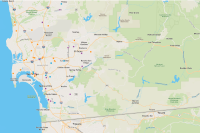

In [22]:
# look at the map in the first slide
first_slide = slides[0]
first_map = first_slide[1].map
first_map

##### Iterate through and update the webmap extents

In [23]:
for slide in slides:
    slide[1].set_viewpoint(palm_springs_extent)
    slide[1].popup_docked=False

##### We also have to update the Button

In [24]:
button = slides[4][0]
button.link = "https://censusreporter.org/profiles/16000US0655254-palm-springs-ca/"

In [25]:
button.link

'https://censusreporter.org/profiles/16000US0655254-palm-springs-ca/'

### Save all changes

<Item title:"Exploring Palm Springs" type:StoryMap owner:naubry_geosaurus>
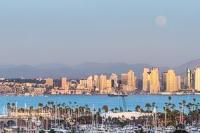

In [26]:
new_story.save()